# Naive Bayes Classifiers

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear
models.

However, they tend to be **even faster in training**. 


---

There are three kinds of naive Bayes classifiers implemented in scikit-learn: `GaussianNB`, `BernoulliNB`, and `MultinomialNB`:
- `GaussianNB` can be applied to any continuous data
- `BernoulliNB` assumes binary data
- `MultinomialNB` assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence).

In [4]:
X = np.array([[0, 1, 0, 1],
            [1, 0, 1, 1],
            [0, 0, 0, 1],
            [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

In [5]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
    
print(f"Feature counts:\n{counts}")

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


**To make a prediction, a data point is compared to the statistics for each of the classes,
and the best matching class is predicted.**

## Gaussian Naive Bayes

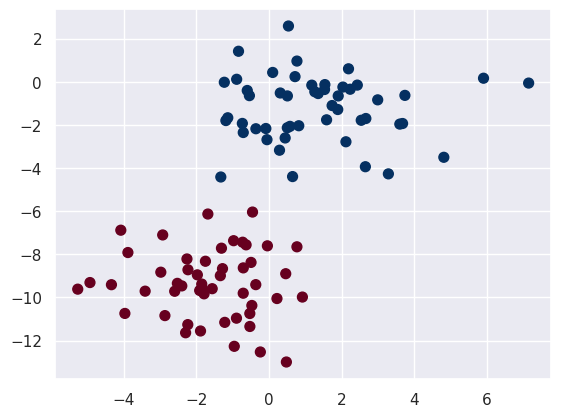

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.show()

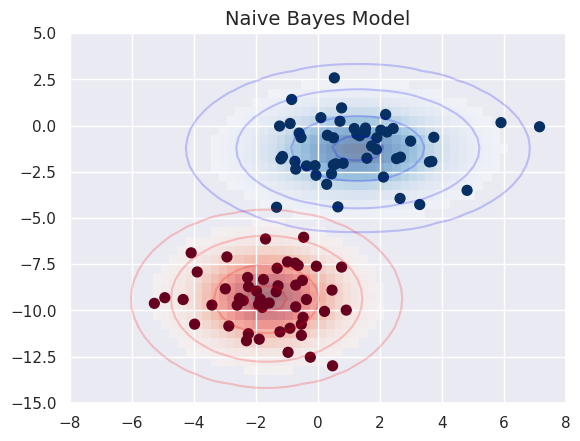

In [7]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
plt.show()

In [8]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

In [9]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

ynew = model.predict(Xnew)

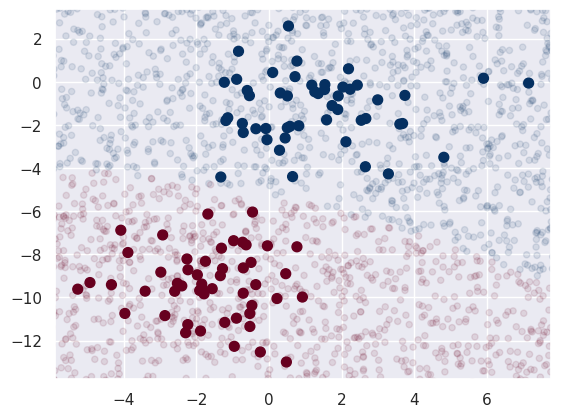

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
# plot new data
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);
plt.show()

In [11]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Example: Multinomial Naive Bayes - Classifying Text

In [13]:
from sklearn.datasets import fetch_20newsgroups

In [14]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [15]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [18]:
tfidf.fit(train.data)
train_data_transorfed = tfidf.transform(train.data)
test_data_transorfed = tfidf.transform(test.data)

In [20]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [21]:
mnb.fit(train_data_transorfed, train.target)

MultinomialNB()

In [22]:
labels = mnb.predict(test_data_transorfed)

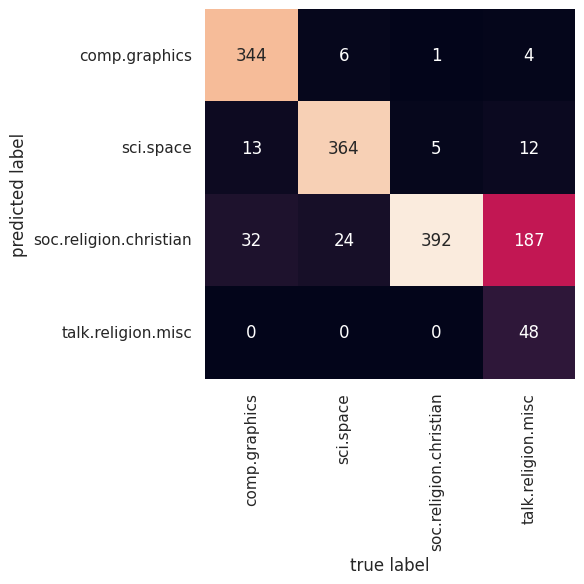

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [25]:
def predict_category(s, train=train, model=mnb, tfidf=tfidf):
    s_trasfomed = tfidf.transform([s])
    pred = model.predict(s_trasfomed)
    return train.target_names[pred[0]]

In [26]:
predict_category('sending a payload to the ISS')

'sci.space'

In [27]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [28]:
predict_category('determining the screen resolution')

'comp.graphics'

In [29]:
predict_category('my gpu card is very expensive')

'comp.graphics'

In [30]:
predict_category('gpu on my computer not working')

'comp.graphics'

## Parameters

- MultinomialNB and BernoulliNB have a single parameter, **`alpha`, which controls
model complexity**. 
- The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. 
- This results in a “smoothing” of the statistics. 
- **A large alpha means more smoothing, resulting in less complex models.**
- The algorithm’s performance is relatively robust to the setting of alpha, meaning that setting alpha is not critical for good performance. However, tuning it usually improves accuracy somewhat.

## Strengths

That said, they have several advantages:
- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable (the training procedure is easy to understand)
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a **good choice as an initial baseline classification**. 
1. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. 
2. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.


Naive Bayes classifiers tend to perform especially well in one of the following situations:
- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

This means that **clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions**, assuming the new dimensions actually add information. 

For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: **once you have enough data, even a simple model can be very powerful**.

## Weaknesses

Because naive Bayesian classifiers make such **stringent assumptions about data**, they will generally **not perform as well as a more complicated model**. 

## Usage

- GaussianNB is mostly used on very high-dimensional data.
- BernoulliNB, and MultinomialNB are widely used for sparse count data such as text.

MultinomialNB
usually performs better than BernoulliNB, particularly on datasets with a relatively
large number of nonzero features (i.e., large documents).

Naive Bayes models are great baseline models and
are often used on very large datasets, where training even a linear model might take
too long.